# Feature Scaling: Normalization

`Normalization` is a feature scaling technique that rescales numerical features to a **fixed range**, typically
between **0 and 1**. It changes the scale of the data while preserving the relative relationships between values.

Normalization is also known as **Min–Max Scaling**.

---

## Why Normalization is Important

Normalization is important because many machine learning algorithms:
- Are sensitive to the magnitude of feature values  
- Use distance-based calculations  
- Perform better when inputs lie in a bounded range  

Without normalization, features with larger numeric ranges can dominate model behavior.

---

## Normalization Formula (Min–Max Scaling)

Each value \( x \) is transformed using:

$$
x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

Where:
- $(x_{\min})$ = minimum value of the feature  
- $(x_{\max})$ = maximum value of the feature  

After normalization:
- All values lie in the range \([0, 1]\)

---

## When to Use Normalization

Normalization is recommended when using:
- k-Nearest Neighbors (k-NN)  
- Neural Networks  
- Distance-based clustering (K-Means)  
- Image and pixel-based data  
- Algorithms that require bounded inputs  

---

## When Normalization is Not Required

Normalization is usually not required for:
- Tree-based models (Decision Trees, Random Forests, XGBoost)  
- Rule-based models  

These models split on feature thresholds and are not affected by feature scale.



In [ ]:
%%capture
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df = df.loc[:, ['quality', 'alcohol', 'residual sugar']]
df.sample(10)


,quality,alcohol,residual sugar
504,5,10.5,3.0
98,6,14.0,1.8
36,6,9.4,2.1
476,5,9.5,1.7
458,4,11.0,2.2
715,5,10.4,1.8
906,6,9.5,2.3
114,5,9.4,7.3
544,5,9.7,2.8
20,5,9.4,1.9


In [6]:
X=df.drop('quality',axis=1)
y=df['quality']
X,y

(      alcohol  residual sugar
 0         9.4             1.9
 1         9.8             2.6
 2         9.8             2.3
 3         9.8             1.9
 4         9.4             1.9
 ...       ...             ...
 1138     11.0             2.3
 1139      9.5             1.9
 1140     10.5             2.0
 1141     11.2             2.2
 1142     10.2             2.0
 
 [1143 rows x 2 columns],
 0       5
 1       5
 2       5
 3       6
 4       5
        ..
 1138    6
 1139    6
 1140    5
 1141    6
 1142    5
 Name: quality, Length: 1143, dtype: int64)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_test

(      alcohol  residual sugar
 12       10.5             1.8
 758      11.4             2.0
 636      11.8             2.6
 1109      9.9             2.2
 743       9.1             3.9
 ...       ...             ...
 1044     11.0             2.3
 1095      9.0             1.9
 1130     11.9             2.4
 860       9.5             2.0
 1126     11.8             2.2
 
 [914 rows x 2 columns],
         alcohol  residual sugar
 158    9.500000             1.5
 1081   9.233333             4.1
 291   10.500000             1.9
 538    9.100000             1.7
 367   11.900000             4.3
 ...         ...             ...
 66    10.500000             1.4
 328   11.500000             2.0
 67    10.700000             3.0
 231    9.200000            11.0
 966   10.033333             1.4
 
 [229 rows x 2 columns])

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [12]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled

array([[0.375     , 0.06164384],
       [0.53571429, 0.07534247],
       [0.60714286, 0.11643836],
       ...,
       [0.625     , 0.10273973],
       [0.19642857, 0.07534247],
       [0.60714286, 0.0890411 ]], shape=(914, 2))

In [15]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_train_scaled

,alcohol,residual sugar
0,0.375000,0.061644
1,0.535714,0.075342
2,0.607143,0.116438
3,0.267857,0.089041
4,0.125000,0.205479
...,...,...
909,0.464286,0.095890
910,0.107143,0.068493
911,0.625000,0.102740
912,0.196429,0.075342


In [16]:
np.round(X_train_scaled.describe(),1)

,alcohol,residual sugar
count,914.0,914.0
mean,0.4,0.1
std,0.2,0.1
min,0.0,0.0
25%,0.2,0.1
50%,0.3,0.1
75%,0.5,0.1
max,1.0,1.0


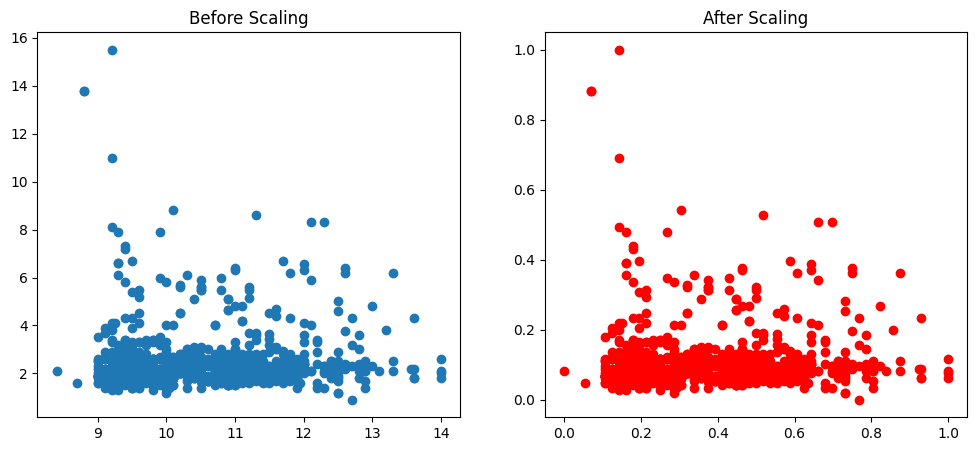

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['alcohol'], X_train['residual sugar'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['alcohol'], X_train_scaled['residual sugar'],color='red')
ax2.set_title("After Scaling")
plt.show()